<AxesSubplot:>

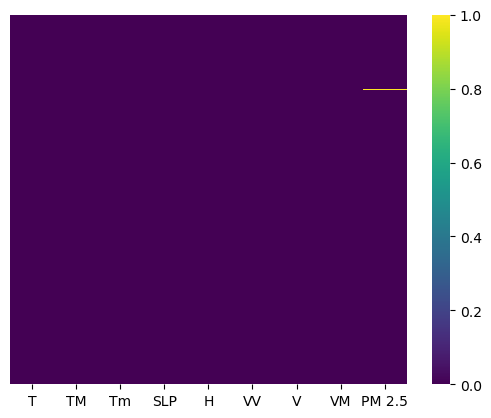

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('F:\DATA SCIENCE\Projects\AQI Delhi project\Data\Real_Data\Real_Combine.csv')
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=True,)

<AxesSubplot:>

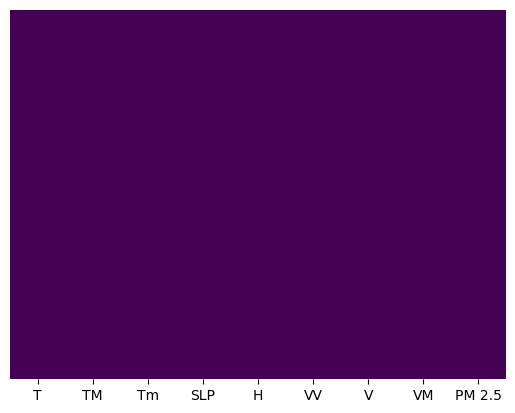

In [2]:
df.dropna(inplace=True)
df.reset_index(drop=True)
sns.heatmap(data=df.isnull(),yticklabels=False,cmap='viridis',cbar=False,)

In [3]:
X=df.iloc[:,:-1] # independant features
y=df.iloc[:,-1]  # independant feature

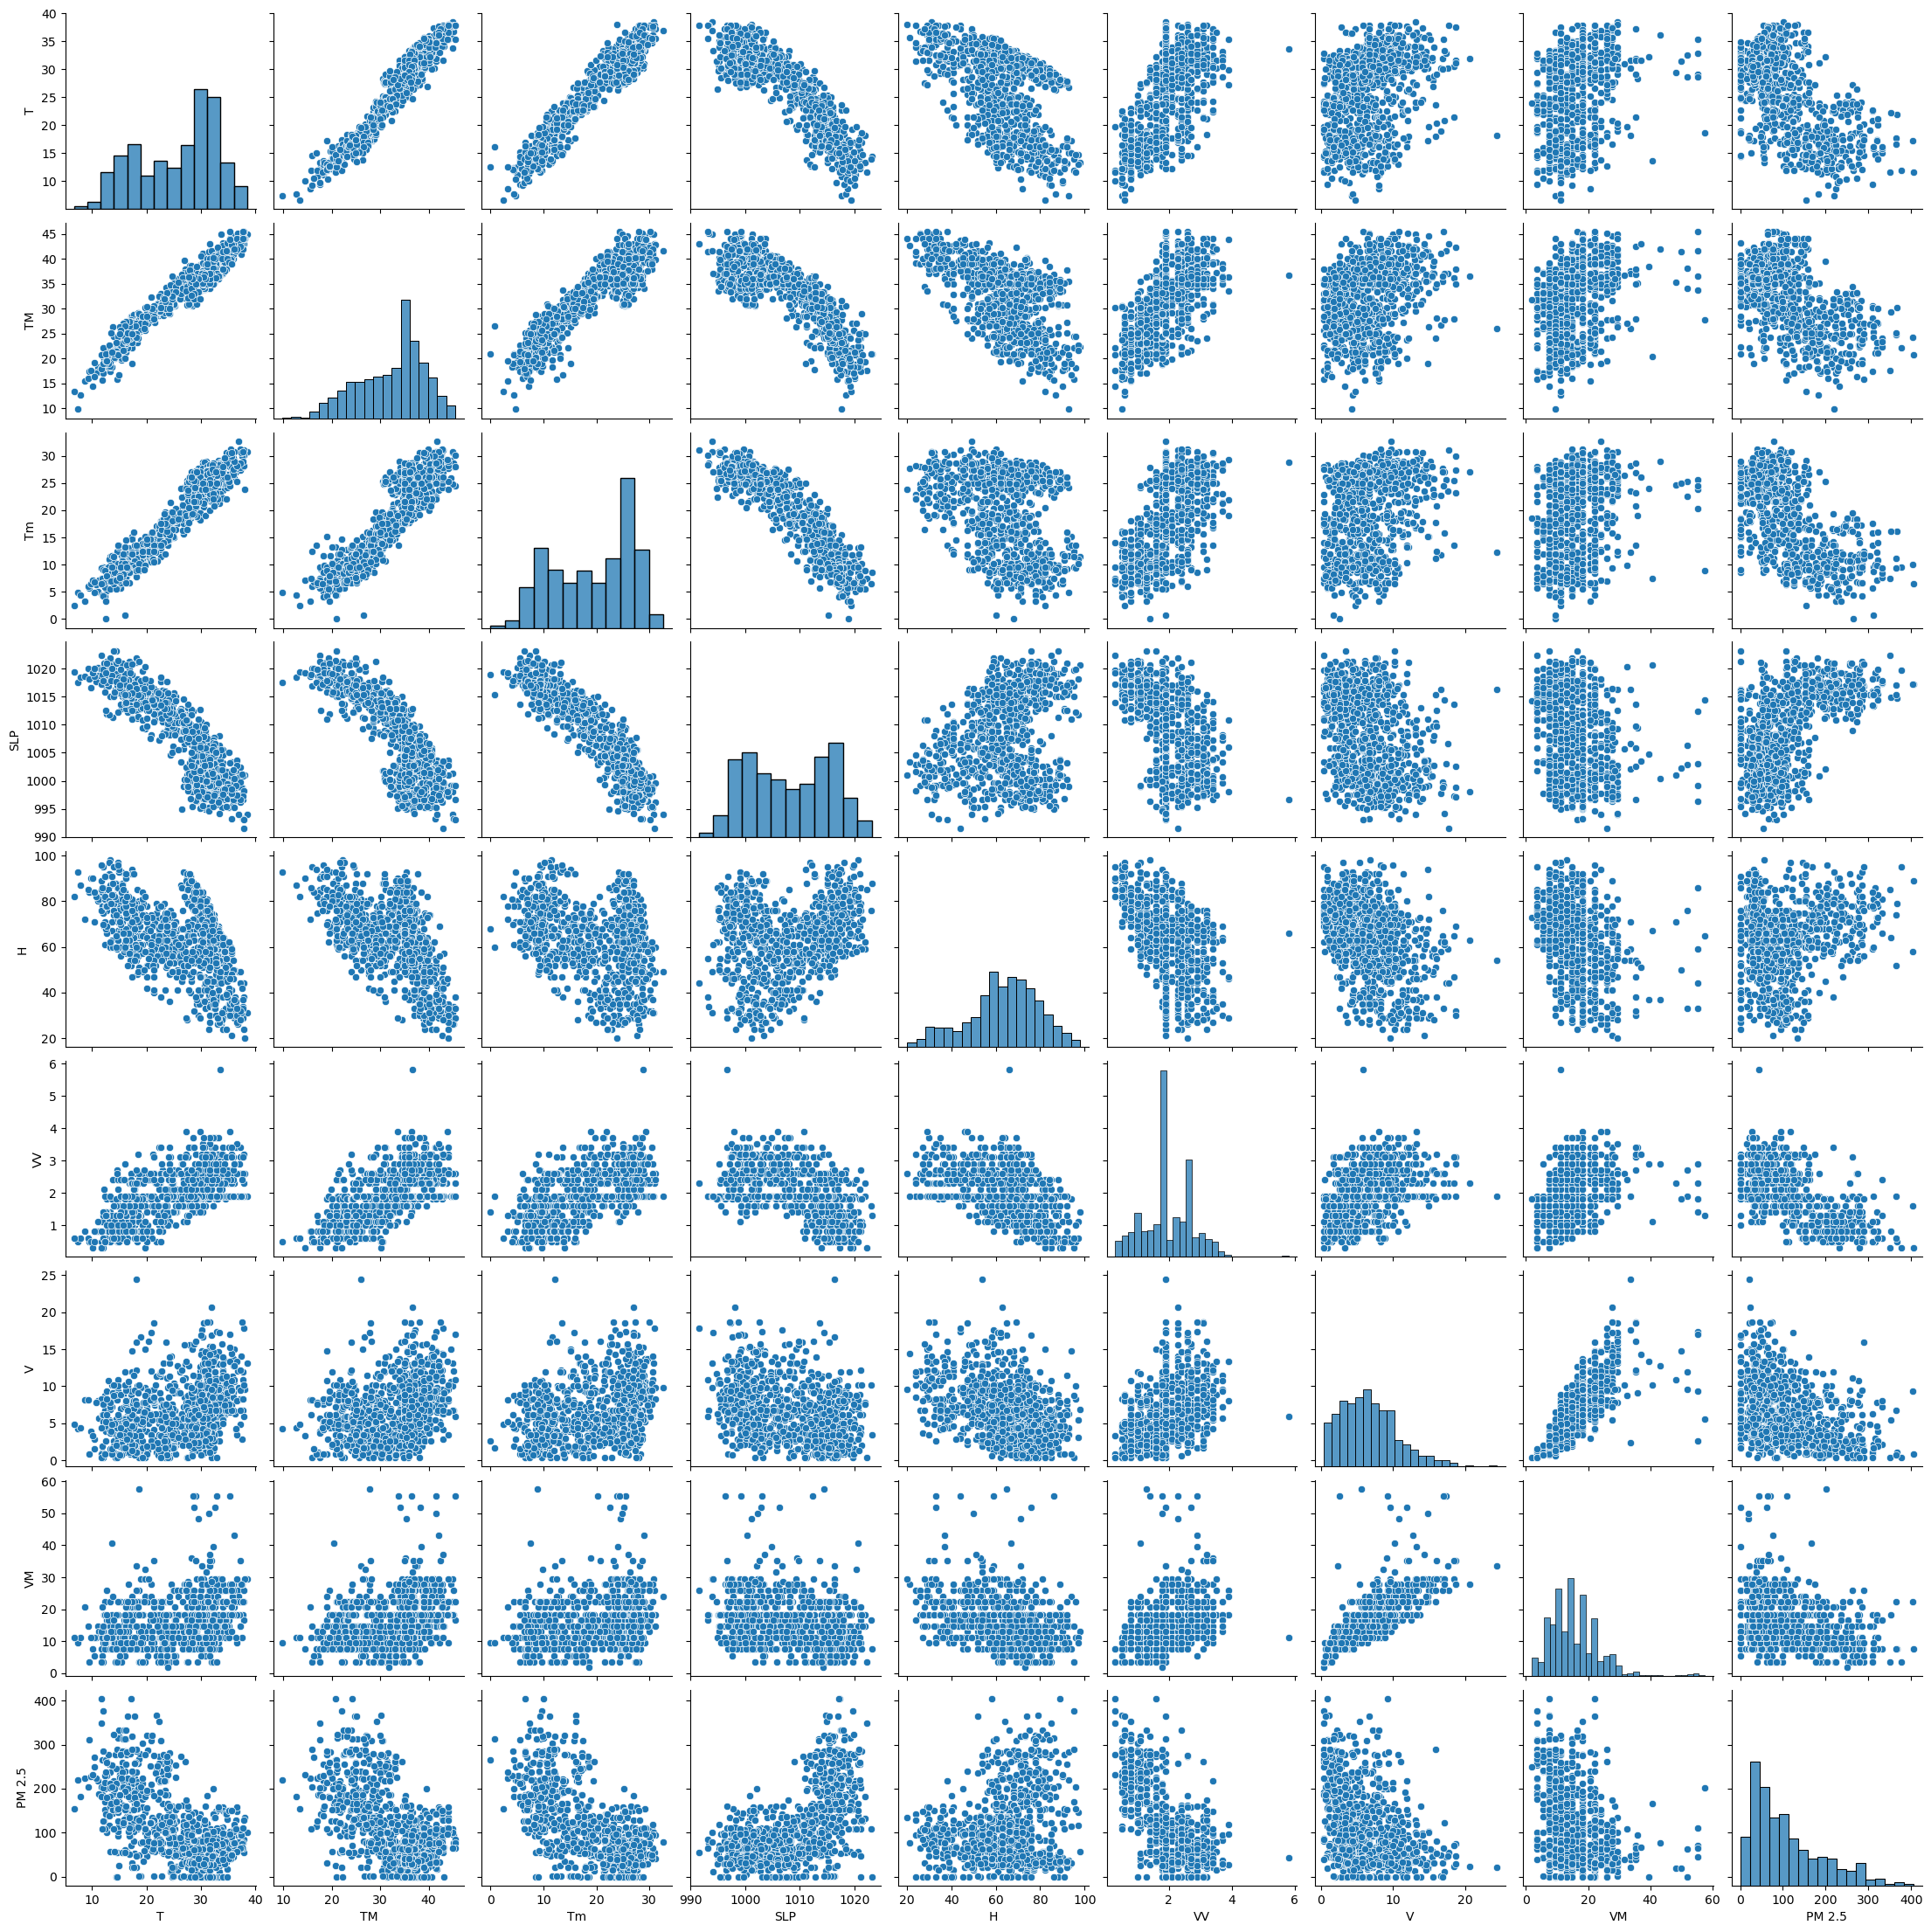

In [4]:
sns.pairplot(df)

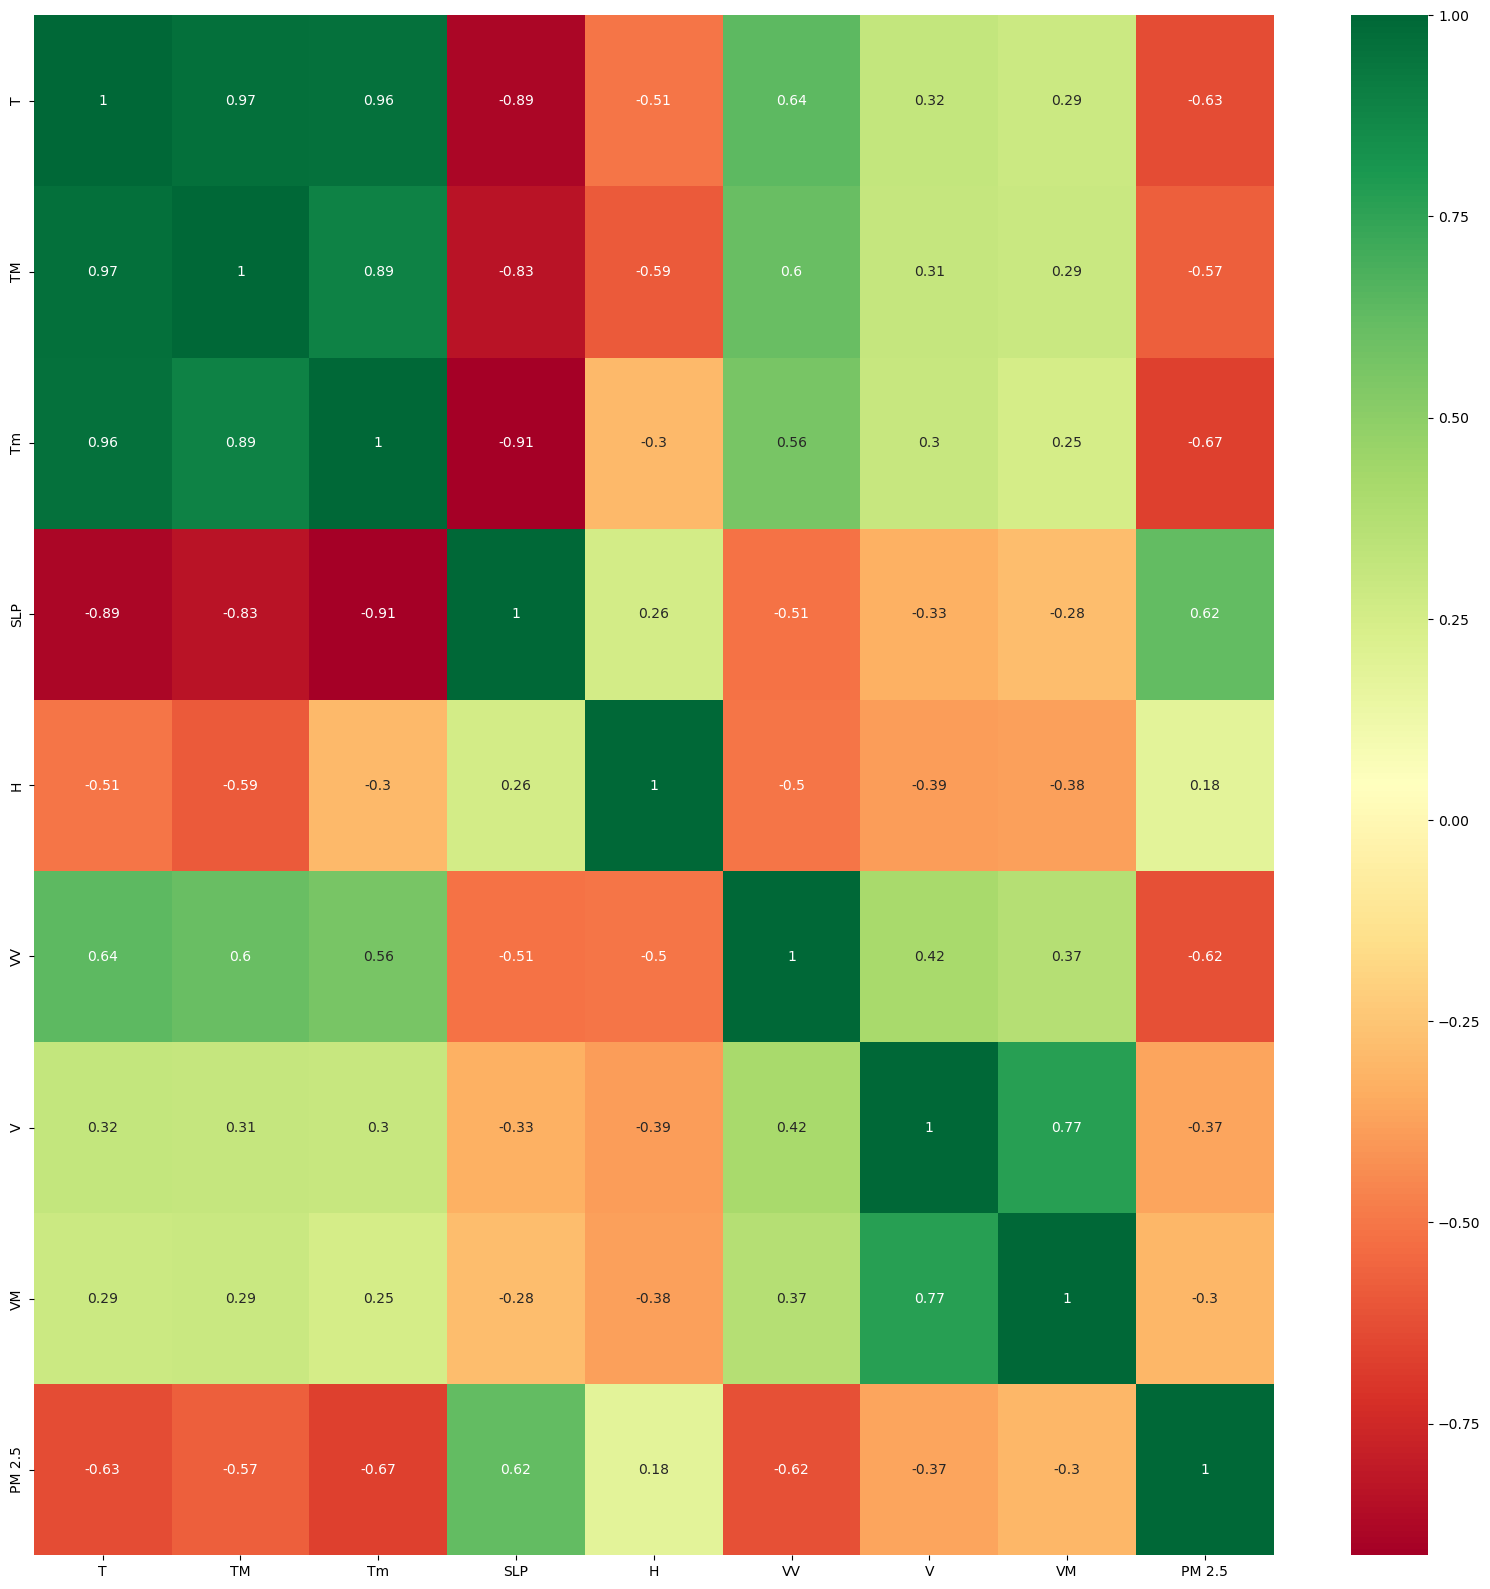

In [5]:
plt.figure(figsize=(20,20))
corr_mat=df.corr()
top_corr_features=corr_mat.index
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [7]:
print(model.feature_importances_)

[0.17079343 0.11258407 0.16857846 0.13784948 0.07516284 0.2371154
 0.05757504 0.04034126]


c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

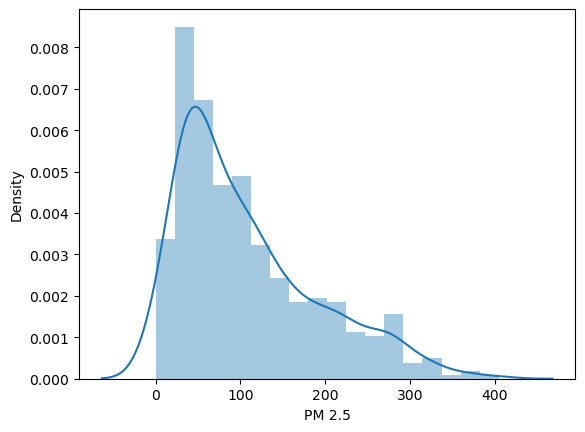

In [8]:
sns.distplot(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)


RandomForestRegressor()

In [11]:
print("Coefficient of R^2 on the training data: {}".format(regressor.score(X_train,y_train)))

Coefficient of R^2 on the training data: 0.9498039006554317


In [12]:
print("Coefficient of R^2 on the test data: {}".format(regressor.score(X_test,y_test)))

Coefficient of R^2 on the test data: 0.6127884964518321


In [13]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score

array([0.63852291, 0.47535782, 0.67938645, 0.3803719 , 0.53000028])

In [14]:
score.mean()

0.54072787001992

In [15]:
prediction=regressor.predict(X_test)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

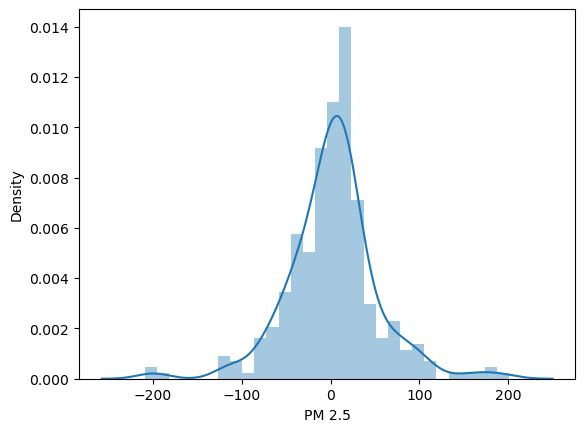

In [16]:
sns.distplot(prediction-y_test)

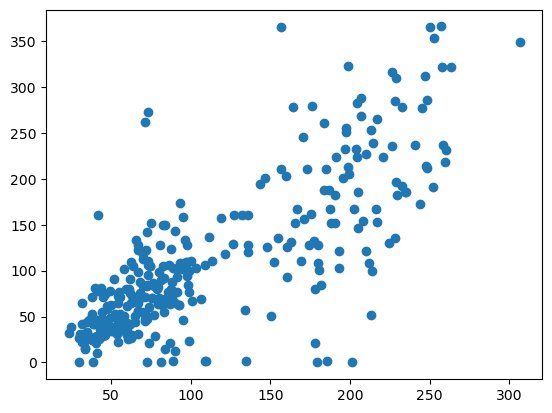

In [17]:
plt.scatter(prediction,y_test
            )

In [18]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(100,1200,num=12)]
criterion=['squared_error', 'absolute_error', 'friedman_mse', 'poisson']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,20,50,100]
min_samples_leaf=[1,2,5,10]
max_features=['sqrt','log2','None','auto']


In [19]:
random_grid={
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['sqrt', 'log2', 'None', 'auto'], 'min_samples_split': [2, 5, 10, 15, 20, 50, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [20]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=2,random_state=42)

In [21]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=friedman_mse, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=300; total time=   0.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   4.5s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total ti

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.7s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.7s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END criterion=friedman_mse, max_depth=25, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimat

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   3.7s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END criterion=absolute_error, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   3.8s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=400

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=400; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.7s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.7s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   2.2s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   1.9s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   2.2s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=60

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.5s
[

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   1.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   1.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   1.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=50, n_estimators=1000; total time=   1.6s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=600; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=600; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=600; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=600; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=50, n_estimators=600; total time=   0.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   1.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000; total time=   1.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=800; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   3.4s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total ti

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END criter

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; total time=   2.3s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=   1.6s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=   1.5s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=   1.4s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=   1.5s
[CV] END criterion=squared_error, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1200; total time=   1.5s
[CV] END criterion=poisson, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; tot

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=   1.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=   1.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=   1.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=   1.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1100; total time=   1.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=800; total time=   1.2s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=400; total time=   0.4s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=400; total time=   0.4s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=400; total time=   0.4s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=400; total time=   0.4s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=400; total time=   0.4s
[CV] END criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] E

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=700; total time=   0.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=poisson, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.0s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   0.9s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   0.9s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   0.9s
[CV] END criterion=poisson, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=700; total time=   6.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=700; total time=   6.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=700; total time=   6.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=700; total time=   6.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=700; total time=   6.3s
[CV] END criterion=friedman_mse, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END criterion=friedman_mse, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END criterion=friedman_mse, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END criterion=friedman_mse, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END criterion=friedman_mse, max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1000; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   5.9s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   5.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   5.7s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   6.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=800; total time=   5.9s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=20, n_estimators=900; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=20, n_estimators=900; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=20, n_estimators=900; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=20, n_estimators=900; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=20, n_estimators=900; total time=   0.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=800; total time=   6.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=800; total time=   6.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=800; total time=   6.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=800; total time=   6.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=800; total time=   6.6s
[CV] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=1

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   1.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   1.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   1.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   1.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=900; total time=   1.5s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   0.1s
[CV] END criterion=poisson, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=50, n_estimators=800; tot

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.7s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.7s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.7s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.7s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   2.7s
[CV] END criterion=friedman_mse, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   0.9s
[CV] END criterion=friedman_mse, max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.0s
[CV] END criterion=friedman_mse, max_depth=30, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=1200; to

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   2.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   2.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   2.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   2.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   2.0s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimator

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.4s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.6s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.1s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.2s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.1s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.2s
[CV] END criterion=squared_error, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=   1.1s
[CV] END criterion=poisson, max_depth=10, max_features=None, min_samples_leaf=10, min_samples_split=50, n_estimators=1200; 

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.0s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.5s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=friedman_mse, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1200; total time=   1.6s
[CV] END criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=600; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=600; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=600; total time=   0.6s
[CV] END criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=600; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=15, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=600; total time=   0.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END criterion=absolute_error, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=50, n_estimators=200; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=50, n_estimators=200; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=50, n_estimators=200; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=50, n_estimators=200; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=50, n_estimators=200; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimator

c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=200; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=200; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=200; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=200; total time=   1.1s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=50, n_estimators=200; total time=   1.1s
[CV] END criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   0.8s
[CV] END criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   0.7s
[CV] END criterion=friedman_mse, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=800; total time=   0.8s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s


c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END criterion=squared_error, max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=20, max_features=None, min_samples_leaf=5, min_samples_split=20, n_e

c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
105 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\lib\site-packages\sklearn\ut

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2', 'None',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 25,
 'criterion': 'poisson'}

In [30]:
rf_random.best_score_

-2406.8530411329557

In [31]:
pred=rf_random.predict(X_test)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

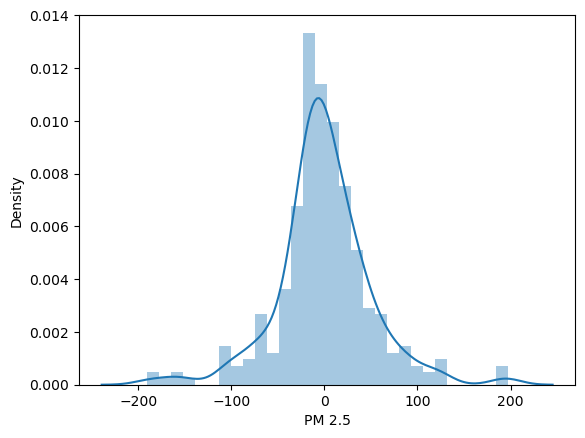

In [32]:
sns.distplot(y_test-pred
             )

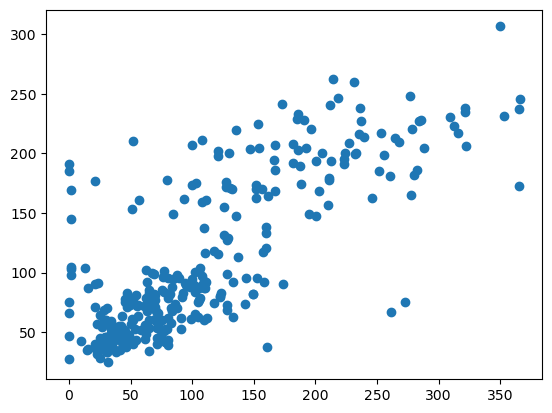

In [33]:
plt.scatter(y_test,pred)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE ', mean_squared_error(y_test,pred))
print('RMSE ',np.sqrt(mean_squared_error(y_test,pred)))

MAE:  35.08154177260975
MSE  2592.0636266804895
RMSE  50.91231311461393


In [35]:
import pickle
file=open('randomForrest_regress.pkl','wb')
pickle.dump(rf_random,file)